<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [4]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [7]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [8]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


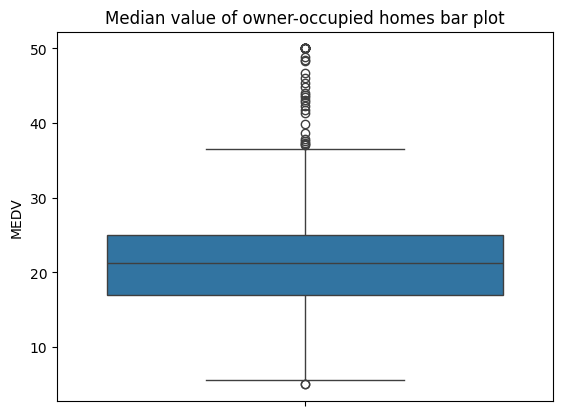

In [9]:
pyplot.title('Median value of owner-occupied homes bar plot')

ax = sns.boxplot( y = 'MEDV', data=boston_df)

pyplot.show()


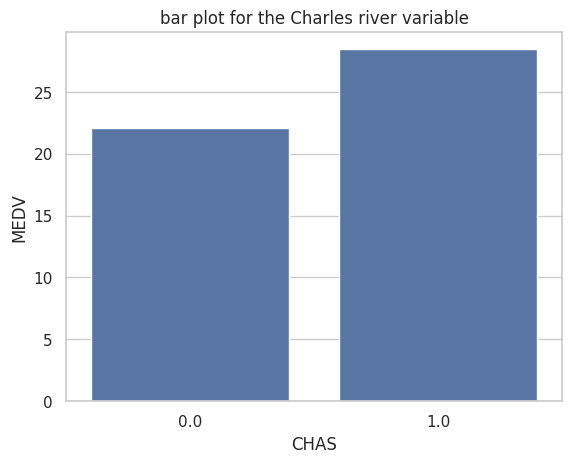

In [11]:
# Bar Plot

pyplot.title('bar plot for the Charles river variable')

chas_medv = boston_df.groupby('CHAS')[['MEDV']].mean().reset_index()

sns.set(style="whitegrid")
ax = sns.barplot(x="CHAS", y="MEDV", data=chas_medv)
pyplot.show()

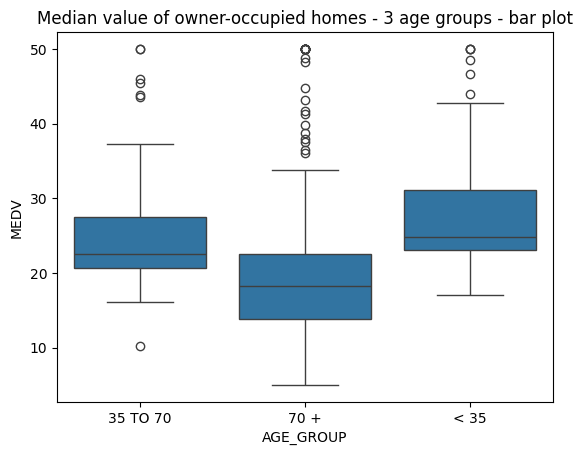

In [9]:

boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '< 35'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = '35 TO 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 +'


pyplot.title('Median value of owner-occupied homes - 3 age groups - bar plot')

ax = sns.boxplot( x = 'AGE_GROUP' , y='MEDV', data=boston_df)

pyplot.show()

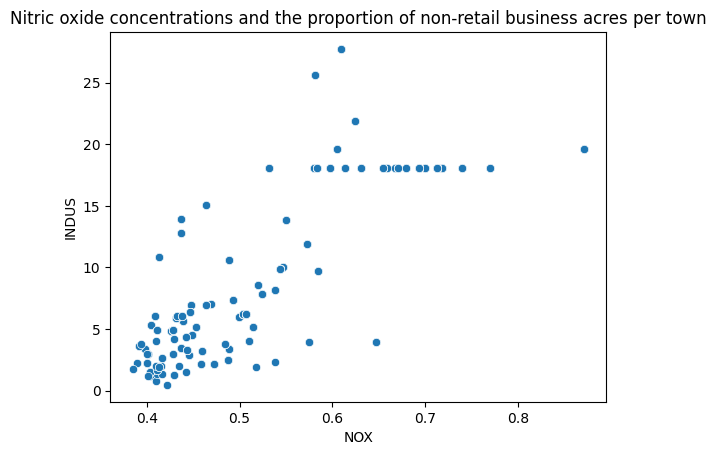

In [11]:
pyplot.title('Nitric oxide concentrations and the proportion of non-retail business acres per town')
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.show()

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

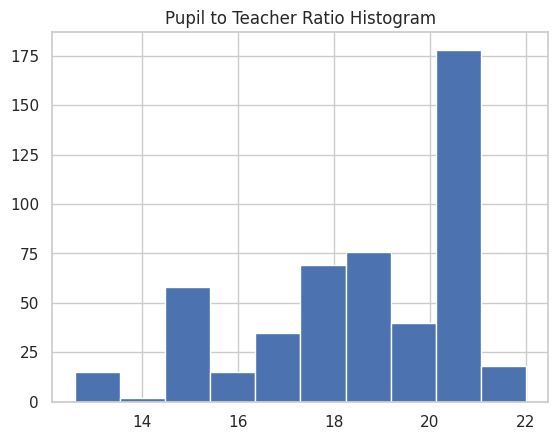

In [13]:
pyplot.title('Pupil to Teacher Ratio Histogram')
pyplot.hist(boston_df['PTRATIO'])

In [11]:
stats.ttest_ind(boston_df[boston_df['CHAS'] == '1']['MEDV'],
                   boston_df[boston_df['CHAS'] == '0']['MEDV'], equal_var = False)

TtestResult(statistic=nan, pvalue=nan, df=nan)

In [10]:

boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '< 35'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = '35 TO 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 +'

thirtyfive_lower = boston_df[boston_df['AGE_GROUP'] == '< 35']['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGE_GROUP'] == '35 TO 70']['MEDV']
seventy_older = boston_df[boston_df['AGE_GROUP'] == '70 +']['MEDV']

thirtyfive_lower

thirtyfive_seventy

seventy_older

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [13]:
## 3rd test
# Null Hypothesis : There is no significant linear relationship (correlation) between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).
# 
# Define the significance level
alpha = 0.05


# Extract the two variables of interest
nox = boston_df['NOX']
indus = boston_df['INDUS']

# 1. Perform the Pearson Correlation Test
# pearsonr returns the correlation coefficient (r) and the two-tailed p-value
r_coefficient, p_value = scipy.stats.pearsonr(indus, nox)

# Print the results
print("--- Pearson Correlation Test Results (NOX vs. INDUS) ---")
print(f"Correlation Coefficient (r): {r_coefficient:.4f}")
print(f"P-value: {p_value:.4e}")
print(f"Significance Level (alpha): {alpha}")

# 2. Determine the conclusion
if p_value < alpha:
    conclusion = "Reject the Null Hypothesis ($H_0$)"
    interpretation = "There is a statistically significant linear relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS)."
else:
    conclusion = "Fail to Reject the Null Hypothesis ($H_0$)"
    interpretation = "There is no statistically significant linear relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS)."

print("\n--- Conclusion ---")
print(f"Decision: {conclusion}")
print(f"Interpretation: {interpretation}")

--- Pearson Correlation Test Results (NOX vs. INDUS) ---
Correlation Coefficient (r): 0.7637
P-value: 7.9134e-98
Significance Level (alpha): 0.05

--- Conclusion ---
Decision: Reject the Null Hypothesis ($H_0$)
Interpretation: There is a statistically significant linear relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS).


In [14]:
#######
## 4. Simple Linear Regression
#######

# Define variables
# Y: Dependent variable (MEDV)
Y = boston_df['MEDV']
# X: Independent variable (DIS - Weighted mean of distances to five Boston employment centres)
X = boston_df['DIS']

# Add a constant term to the independent variable for the intercept (beta_0)
X = sm.add_constant(X)

# 1. Fit the Simple Linear Regression Model
model = sm.OLS(Y, X).fit()

# Print the model summary to get all statistics
print("--- Simple Linear Regression Results (MEDV vs. DIS) ---")
print(model.summary())
print("-" * 64)

# 2. Extract key results for hypothesis testing
# Get the p-value for the DIS coefficient (slope)
dis_p_value = model.pvalues['DIS']
# Get the coefficient for DIS
dis_coefficient = model.params['DIS']

# 3. Determine the conclusion
print(f"Coefficient (DIS): {dis_coefficient:.4f}")
print(f"P-value (DIS): {dis_p_value:.4e}")
print(f"Significance Level (alpha): {alpha}")

print("\n--- Conclusion ---")
if dis_p_value < alpha:
    conclusion = "Reject the Null Hypothesis ($H_0$)"
    # The coefficient is positive, so the interpretation reflects a positive impact
    if dis_coefficient > 0:
        impact = f"For every one-unit increase in the weighted distance to employment centers (DIS), the median house value (MEDV) is estimated to increase by ${abs(dis_coefficient * 1000):.2f} (holding other factors constant)."
    else:
        impact = f"For every one-unit increase in the weighted distance to employment centers (DIS), the median house value (MEDV) is estimated to decrease by ${abs(dis_coefficient * 1000):.2f} (holding other factors constant)."
    
    interpretation = f"Decision: {conclusion}. The weighted distance to employment centers (DIS) has a **statistically significant linear impact** on the median house value (MEDV). \nImpact: {impact}"
else:
    conclusion = "Fail to Reject the Null Hypothesis ($H_0$)"
    interpretation = f"Decision: {conclusion}. There is **no statistically significant linear impact** of the weighted distance to employment centers (DIS) on the median house value (MEDV)."

print(interpretation)



--- Simple Linear Regression Results (MEDV vs. DIS) ---
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 28 Sep 2025   Prob (F-statistic):           1.21e-08
Time:                        18:02:16   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------